# Quiten Healthcare Project

### 01 - Import statements and Loading dataset

In [132]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import string
import seaborn as sns
from nltk.corpus import stopwords

In [134]:
# Loading dataset
df = pd.read_csv("data/raw_data_healthcare.csv")

# Adding the product and medication columns 
def add_product(row):
    str = row['medication'].lower()
    res = str.split("for ")
    if len(res[0]) == 0 :
        res[0] ='Not mentioned'
    return res[0]

def add_disease(row):
    str = row['medication'].lower()
    res = str.split("for ")
    return res[1]
df['product'] = df.apply(add_product, axis=1)
df['disease'] = df.apply(add_disease, axis=1)
df.drop(columns = ['medication'], inplace=True)

# Adding a less granular mapping of disease
disease_mapping = {
    "crohn's disease": "crohn",
    "ulcerative colitis": "ulcerative colitis",
    "rheumatoid arthritis": "rheumatoid arthritis",
    "multiple sclerosis": "multiple sclerosis",
    "ankylosing spondylitis": "ankylosing spondylitis",
    "psoriasis" : "psoriasis",
    "psoriatic arthritis" : "psoriasis",
    "crohn's disease, maintenance" : "crohn",
    "ulcerative colitis, maintenance" : "ulcerative colitis",
    "crohn's disease, acute" : "crohn",
    "plaque psoriasis" : "psoriasis"
}

def map_disease(disease):
    disease = disease.lower()
    for key, value in disease_mapping.items():
        if key in disease:
            return value
    return "others"
df['disease_category'] = df['disease'].apply(map_disease)

# Displaying the dataframe 
df.head()

,text_index,rate,comment,product,disease,disease_category
0,0,1.0,Insurance forced me to switch to inflectra due...,inflectra (infliximab),crohn's disease,crohn
1,1,NaN,My wife had RA from when she was a child. She ...,remicade (infliximab),rheumatoid arthritis,rheumatoid arthritis
2,2,1.0,This medication Remicade made me in constant p...,remicade (infliximab),ulcerative colitis,ulcerative colitis
3,3,1.0,"I have Fistulizing Crohn's, dx'd 6 yrs ago @ 3...",inflectra (infliximab),crohn's disease,crohn
4,4,10.0,Remicade literally gave me my life back 9 yrs ...,remicade (infliximab),ulcerative colitis,ulcerative colitis


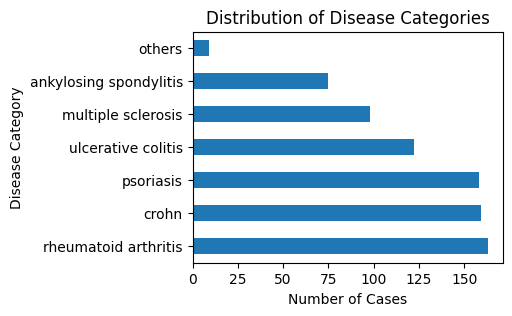

In [141]:
# Count the occurrences of each disease category
disease_counts = df["disease_category"].value_counts()
plt.figure(figsize=(4, 3))
disease_counts.plot(kind='barh')  # Utilize 'barh' for horizontal bar chart
plt.title("Distribution of Disease Categories")
plt.xlabel("Number of Cases")
plt.ylabel("Disease Category")
plt.show()


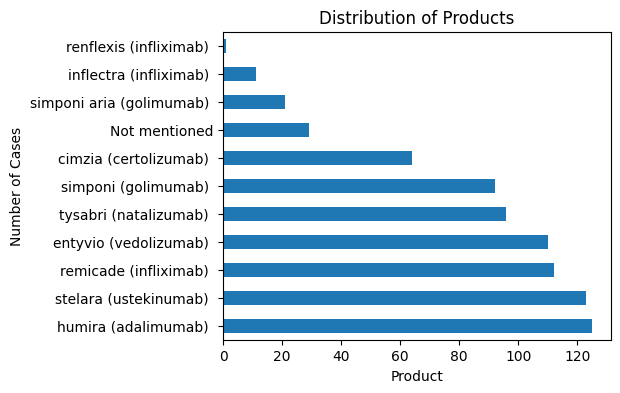

In [139]:
# Count the occurrences of each disease category
disease_counts = df["product"].value_counts()
plt.figure(figsize=(5, 4))
disease_counts.plot(kind='barh')
plt.title("Distribution of Products")
plt.xlabel("Product")
plt.ylabel("Number of Cases")

# Show the plot
plt.show()

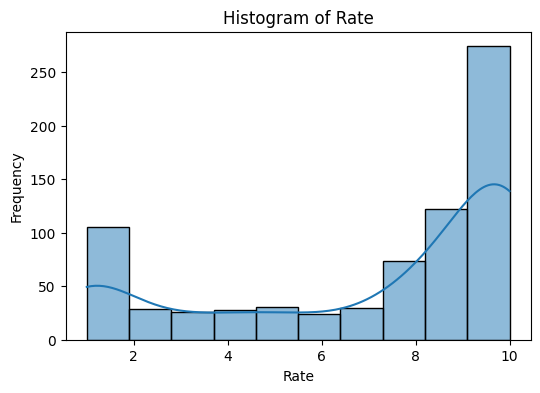

In [142]:
# Tracer l'histogramme de la variable "rate"
plt.figure(figsize=(6, 4))
sns.histplot(df['rate'], kde=True, bins=10)
plt.title("Histogram of Rate")
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.show()


### 02 - Cleaning the comments 

In [180]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def clean_comment(row):
    # To clean the comments
    comment = row['comment'].lower() 
    comment = ''.join([char for char in comment if char not in string.punctuation]) # Delete ponctuation
    words = comment.split() # Split comment into words 
    stop_words = set(stopwords.words('english')) 
    words = [word for word in words if word not in stop_words] # Delete stop words (english)
    cleaned_comment = ' '.join(words) # Join words in one cleaned comment
    return cleaned_comment

def word_tokenization(row):
    comment = row['cleaned_comment'].lower()
    words = nltk.word_tokenize(comment)  # Tokenization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words] # Lemmatization
    return lemmatized_words

def create_word_pairs(row):
    tokenized_comment = row['tokenized_comment']
    word_pairs = [" ".join([tokenized_comment[i], tokenized_comment[i+1]]) for i in range(len(tokenized_comment) - 1)]
    return word_pairs

def create_word_triplets(row):
    tokenized_comment = row['tokenized_comment']
    word_triplets = [" ".join([tokenized_comment[i], tokenized_comment[i+1], tokenized_comment[i+2]]) for i in range(len(tokenized_comment) - 2)]
    return word_triplets

def preprocessing_function(df):
    df = df.copy()
    df['cleaned_comment'] = df.apply(clean_comment, axis=1) # Removes stop words
    df['tokenized_comment'] = df.apply(word_tokenization, axis=1) # Word tokenization and lemmatization
    df['word_pairs'] = df.apply(create_word_pairs, axis=1) 
    df['word_triplets'] = df.apply(create_word_triplets, axis=1) 
    return df

df = preprocessing_function(df)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vitrac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/vitrac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text_index,rate,comment,product,disease,disease_category,cleaned_comment,tokenized_comment,word_pairs,word_triplets,Sentiment,Review
0,0,1.0,Insurance forced me to switch to inflectra due...,inflectra (infliximab),crohn's disease,crohn,insurance forced switch inflectra due cheaper ...,"[insurance, forced, switch, inflectra, due, ch...","[insurance forced, forced switch, switch infle...","[insurance forced switch, forced switch inflec...",-0.8970,Negative
1,1,NaN,My wife had RA from when she was a child. She ...,remicade (infliximab),rheumatoid arthritis,rheumatoid arthritis,wife ra child used normal meds till remicade j...,"[wife, ra, child, used, normal, med, till, rem...","[wife ra, ra child, child used, used normal, n...","[wife ra child, ra child used, child used norm...",-0.5994,Negative
2,2,1.0,This medication Remicade made me in constant p...,remicade (infliximab),ulcerative colitis,ulcerative colitis,medication remicade made constant pain slept t...,"[medication, remicade, made, constant, pain, s...","[medication remicade, remicade made, made cons...","[medication remicade made, remicade made const...",-0.9779,Negative
3,3,1.0,"I have Fistulizing Crohn's, dx'd 6 yrs ago @ 3...",inflectra (infliximab),crohn's disease,crohn,fistulizing crohns dxd 6 yrs ago 36yo 11 surge...,"[fistulizing, crohn, dxd, 6, yr, ago, 36yo, 11...","[fistulizing crohn, crohn dxd, dxd 6, 6 yr, yr...","[fistulizing crohn dxd, crohn dxd 6, dxd 6 yr,...",-0.9413,Negative
4,4,10.0,Remicade literally gave me my life back 9 yrs ...,remicade (infliximab),ulcerative colitis,ulcerative colitis,remicade literally gave life back 9 yrs ago il...,"[remicade, literally, gave, life, back, 9, yr,...","[remicade literally, literally gave, gave life...","[remicade literally gave, literally gave life,...",-0.1737,Negative


### 03 - Adding a first Sentiment Analysis to the dataframe

In [181]:
pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [182]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
Analyzer = SentimentIntensityAnalyzer()

In [183]:
# Function to calculate vader sentiment
def sentiment_scores(review):
    ss = Analyzer.polarity_scores(review)
    return ss['compound']

# Function to analyse the sentiment
def sentiment_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
df['Sentiment'] = df['cleaned_comment'].apply(sentiment_scores)
df['Review'] = df['Sentiment'].apply(sentiment_analysis)
df.head()


,text_index,rate,comment,product,disease,disease_category,cleaned_comment,tokenized_comment,word_pairs,word_triplets,Sentiment,Review
0,0,1.0,Insurance forced me to switch to inflectra due...,inflectra (infliximab),crohn's disease,crohn,insurance forced switch inflectra due cheaper ...,"[insurance, forced, switch, inflectra, due, ch...","[insurance forced, forced switch, switch infle...","[insurance forced switch, forced switch inflec...",-0.8970,Negative
1,1,NaN,My wife had RA from when she was a child. She ...,remicade (infliximab),rheumatoid arthritis,rheumatoid arthritis,wife ra child used normal meds till remicade j...,"[wife, ra, child, used, normal, med, till, rem...","[wife ra, ra child, child used, used normal, n...","[wife ra child, ra child used, child used norm...",-0.5994,Negative
2,2,1.0,This medication Remicade made me in constant p...,remicade (infliximab),ulcerative colitis,ulcerative colitis,medication remicade made constant pain slept t...,"[medication, remicade, made, constant, pain, s...","[medication remicade, remicade made, made cons...","[medication remicade made, remicade made const...",-0.9779,Negative
3,3,1.0,"I have Fistulizing Crohn's, dx'd 6 yrs ago @ 3...",inflectra (infliximab),crohn's disease,crohn,fistulizing crohns dxd 6 yrs ago 36yo 11 surge...,"[fistulizing, crohn, dxd, 6, yr, ago, 36yo, 11...","[fistulizing crohn, crohn dxd, dxd 6, 6 yr, yr...","[fistulizing crohn dxd, crohn dxd 6, dxd 6 yr,...",-0.9413,Negative
4,4,10.0,Remicade literally gave me my life back 9 yrs ...,remicade (infliximab),ulcerative colitis,ulcerative colitis,remicade literally gave life back 9 yrs ago il...,"[remicade, literally, gave, life, back, 9, yr,...","[remicade literally, literally gave, gave life...","[remicade literally gave, literally gave life,...",-0.1737,Negative


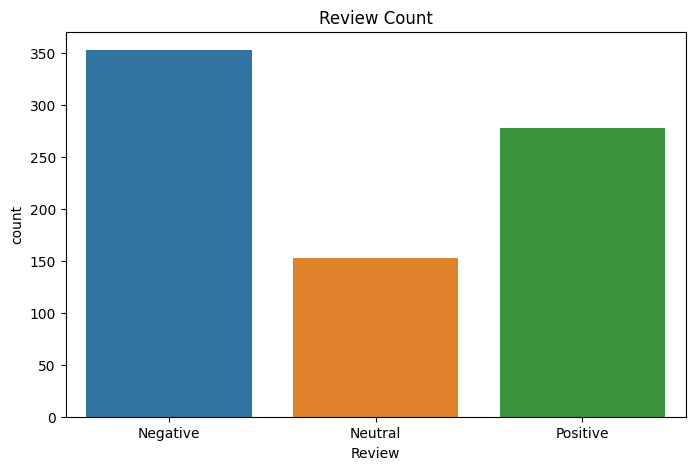

In [184]:
# Review Countplot
plt.figure(figsize=(8,5))
plt.title('Review Count')
sns.countplot(x=df['Review'], data=df)
plt.show()

### 05 - Wordcloud display

In [185]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [186]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /Users/vitrac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vitrac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/vitrac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/vitrac/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vitrac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


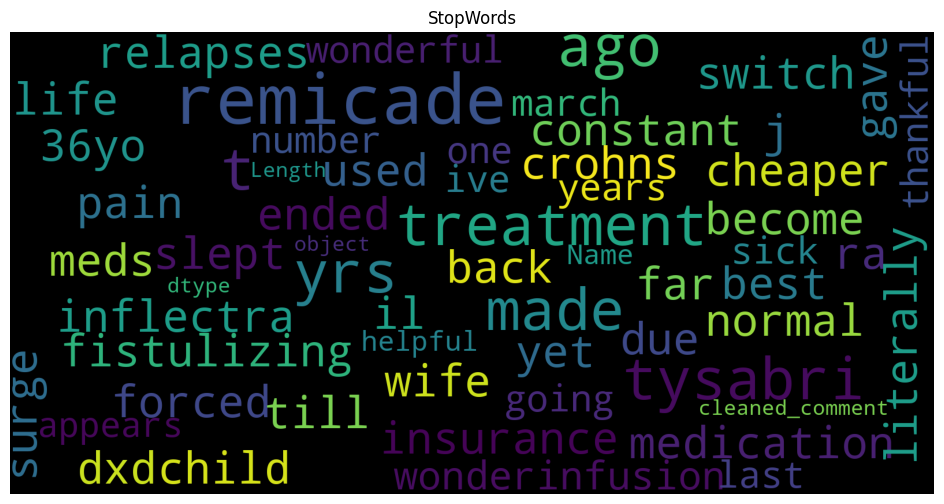

In [187]:
stopwords = set(STOPWORDS)

# Function to generate stopwords
def show_wordcloud(df):
    wordcloud = WordCloud(max_words=150,
                          background_color='black',
                          max_font_size=30,
                          stopwords=stopwords,
                          scale=4,
                          random_state=1)
    wordcloud = wordcloud.generate(str(df))
    
    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.title('StopWords')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df.cleaned_comment)

In [188]:
df_negative = df[df['Review'] == 'Negative'].copy()
df_positive = df[df['Review'] == 'Positive'].copy()
df_neutral = df[df['Review'] == 'Neutral'].copy()

For the all dataset : 


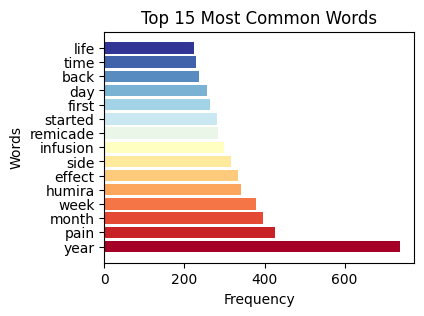

For the negative comments : 


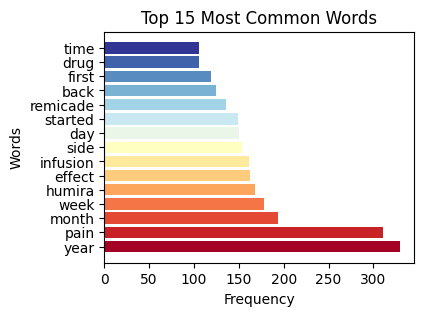

For the positive comments : 


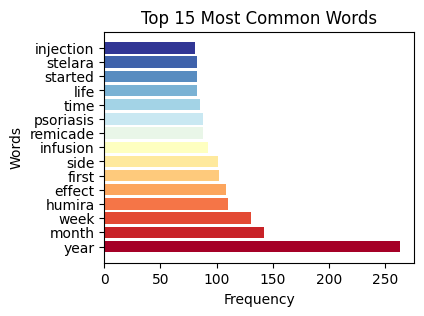

For the neutral comments : 


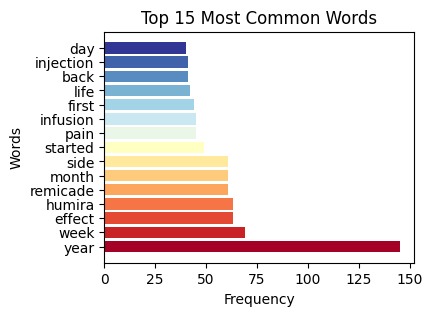

In [196]:
def plot_most_common_words_vertical(df, n=10):
    all_words = [word for word_list in df['tokenized_comment'] for word in word_list]
    all_words = [word for word in all_words if word.isalpha()]
    word_freq = nltk.FreqDist(all_words)
    words, frequencies = zip(*word_freq.items())
    sorted_data = sorted(zip(words, frequencies), key=lambda x: x[1], reverse=True)
    words, frequencies = zip(*sorted_data)
    top_words = words[:n]
    top_frequencies = frequencies[:n]
    colors = plt.cm.RdYlBu(np.linspace(0, 1, n))
    
    # Plot the vertical bar chart
    plt.figure(figsize=(4, 3))
    plt.barh(top_words, top_frequencies, color=colors)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Common Words')
    plt.show()

print('For the all dataset : ')
plot_most_common_words_vertical(df, n=15)
print('For the negative comments : ')
plot_most_common_words_vertical(df_negative, n=15)
print('For the positive comments : ')
plot_most_common_words_vertical(df_positive, n=15)
print('For the neutral comments : ')
plot_most_common_words_vertical(df_neutral, n=15)


For the all dataset : 


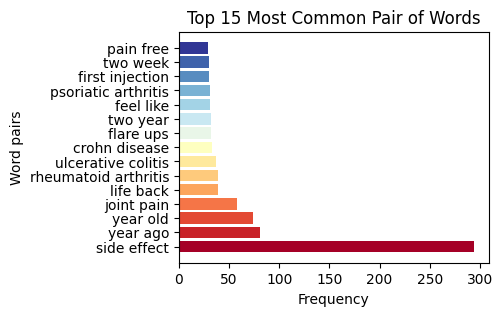

For the negative comments : 


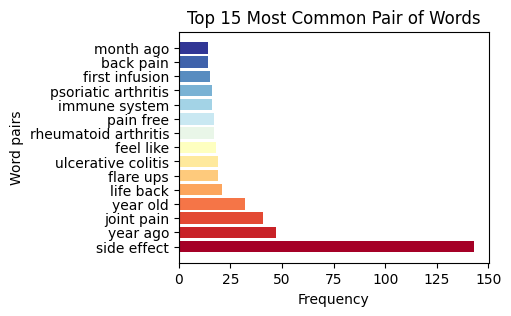

For the positive comments : 


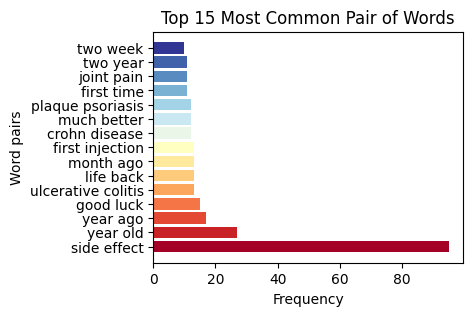

For the neutral comments : 


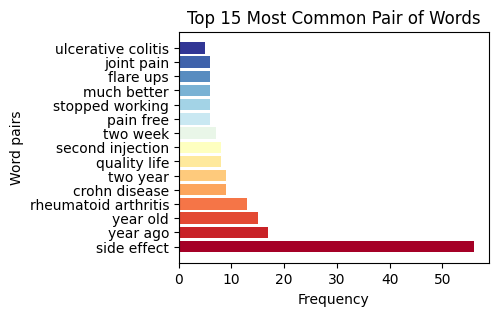

In [190]:
import string

def plot_most_pair_of_words(df, n=10):
    def is_valid_word_pair(word_pair):
        for word in word_pair.split():
            if any(char.isdigit() or char in string.punctuation or char == "’" for char in word):
                return False
        return True

    all_word_pairs = [word_pair for word_pairs_list in df['word_pairs'] for word_pair in word_pairs_list if is_valid_word_pair(word_pair)]
    
    if not all_word_pairs:
        print("No word pairs found in the dataset after filtering.")
        return

    word_freq = nltk.FreqDist(all_word_pairs)
    top_word_pairs = word_freq.most_common(n)
    top_words, top_frequencies = zip(*top_word_pairs)
    colors = plt.cm.RdYlBu(np.linspace(0, 1, n))
    
    # Plot the vertical bar chart
    plt.figure(figsize=(4, 3))
    plt.barh(top_words, top_frequencies, color=colors)
    plt.xlabel('Frequency')
    plt.ylabel('Word pairs')
    plt.title(f'Top {n} Most Common Pair of Words')
    plt.show()

print('For the all dataset : ')
plot_most_pair_of_words(df, n=15)
print('For the negative comments : ')
plot_most_pair_of_words(df_negative, n=15)
print('For the positive comments : ')
plot_most_pair_of_words(df_positive, n=15)
print('For the neutral comments : ')
plot_most_pair_of_words(df_neutral, n=15)


For the all dataset : 


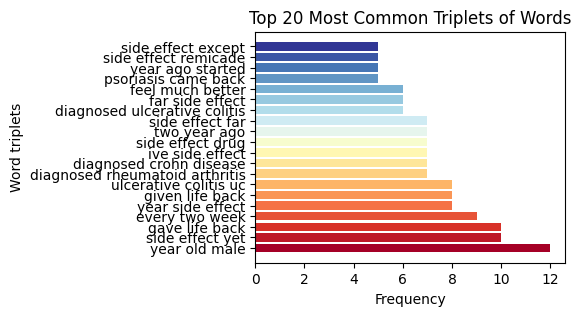

For the negative comments : 


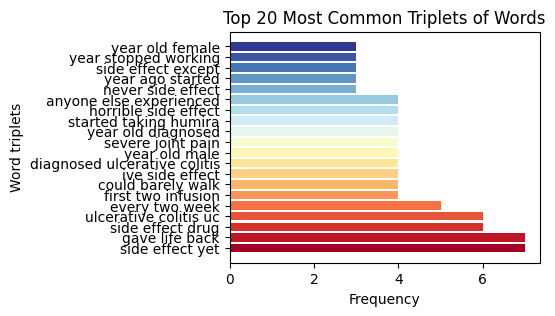

For the positive comments : 


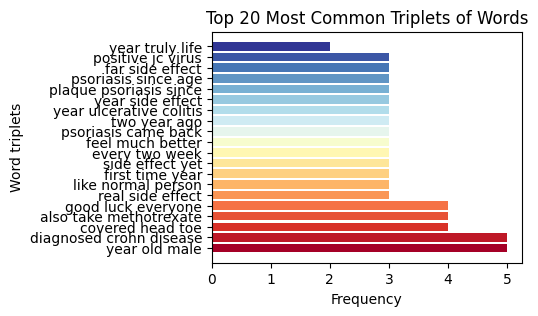

For the neutral comments : 


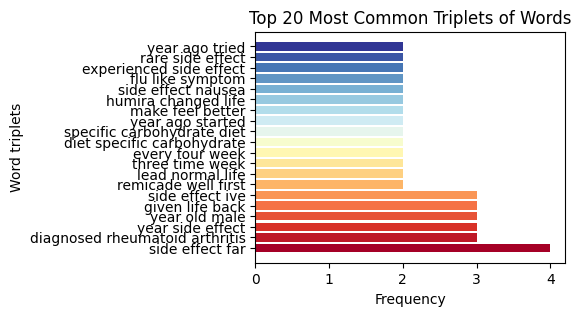

In [192]:
def plot_most_triplets_of_words(df, n=10):
    def is_valid_word_triplet(word_triplet):
        for word in word_triplet.split():
            if any(char.isdigit() or char in string.punctuation or char == "’" for char in word):
                return False
        return True

    all_word_triplets = [word_triplet for word_triplets_list in df['word_triplets'] for word_triplet in word_triplets_list if is_valid_word_triplet(word_triplet)]
    
    if not all_word_triplets:
        print("No word triplets found in the dataset after filtering.")
        return

    word_freq = nltk.FreqDist(all_word_triplets)
    top_word_triplets = word_freq.most_common(n)
    top_word_triplets, top_frequencies = zip(*top_word_triplets)
    colors = plt.cm.RdYlBu(np.linspace(0, 1, n))
    
    # Plot the vertical bar chart
    plt.figure(figsize=(4, 3))
    plt.barh(top_word_triplets, top_frequencies, color=colors)
    plt.xlabel('Frequency')
    plt.ylabel('Word triplets')
    plt.title(f'Top {n} Most Common Triplets of Words')
    plt.show()

print('For the all dataset : ')
plot_most_triplets_of_words(df, n=20)
print('For the negative comments : ')
plot_most_triplets_of_words(df_negative, n=20)
print('For the positive comments : ')
plot_most_triplets_of_words(df_positive, n=20)
print('For the neutral comments : ')
plot_most_triplets_of_words(df_neutral, n=20)
